## Content

| Topic
|-|
|Problem statement and intro | 20 mins |
|Handling missing values | 15 mins |
|Dealing with Anomalies | 10 mins |
|Breakdown of time series data (intro) | 5 mins |
|Moving Averages | 20 mins |
|Trend and Seasonality| 25 min|
|Time series Decomposition | 10 mins |
|MAPE| 5 min|
|Train test split in time series data|5 min|
|Simple Methods of forecasting|30 min|



## Problem statement

#### Imagine you are a Data Scientist at MobiPlus, a mobile manufacturing company

You need to forecast their future sales for better planning and revenue.

- **Agenda 1:** We want to understand the patterns in demand to be able to be better plan for factory maintenance / staffing requirements.
- **Agenda 2:** We need a certain level of accuracy. The management requires that  the Mean Absolute Percentage Error (MAPE) is not more than 5%.
- **Agenda 3:** Need a range forecast to supplement the point forecast to make educated trade-off wherever needed.

Over the next few lectures, we will be completing these tasks.



<br>

> **Q. Why is forecasting the sales volume important for MobiPlus?**

This forecast would help MobiPlus in planning its operations efficiently.

- Having an idea of what future sales value would look like, helps the company plan it's production better. There is no point in **over producing or under producing** the products.

- Also, in peak seasons, the company might want to offer deals to **promote the sale** of their brand.

- Hiring / purchasing / discounting / marketing / maintainance, etc including some other financial or strategy decisions depend very highly on forecasts.


<br>

> **Q. What would be the effect of an over-forecast?**

An over forecast of the value can
- lead to huge piling up of smart phones in the warehouse.
- This will cause an increase in inventory holding cost.
- Also, 30% of the phones would need to be scrapped as these phones have become outdated in the evolving smart phone industry.

<br>

> **Q. What would be the effect of an under-forecast?**

An under forecast can lead to
- lot of unmet demand,
- leading to a poor revenue creation, and
- loss of goodwill amongst its loyal customers.




#### Let's see what our data looks like

You are given a dataset consisting of historical sales corresponding to its respective months.

![picture](https://drive.google.com/uc?export=view&id=179Y0AoR6jKBF5CEsAxqr0JAcCuf0rN8L)


So, here we are given the sales data of a mobile company based on which we have to forecast their **future sales**.

> **Q. Which category does this dataset fall under?**

This kind of data falls under the **time series** category.

<br>

#### **Q. What is time series data?**
A **signal**, indexed by an **ordered timestamp** is a timeseries data.

For it to be a time series, you need minimum two things
- Date / timestamp (denoted t)
- One quantity (denoted y)

Here, t can be in days, weeks, months, years, or even in seconds.

<br>

Data observations like sales, revenues, inventories etc are most commonly expressed as a time series.

Below are some examples of time series data:
1. Stocks data (NIFTY)
 - Here, y is the stock prices
 - t is indexed in days, giving us daily stock data

2. Population Growth Rate for a country
 - Here, y gives the growth rate
 - t is indexed yearly

3. Container Port Traffic
 - Again, y gives the port traffic
 - t is indexed yearly

4. GDP Growth Rate
 - Here, y denotes the GDP for the quater
 - Quaterly series, hence t is indexed in quater years (3 months)


![picture](https://drive.google.com/uc?export=view&id=1af8S1hhoFQkhOmOWN_u2VbhKwD01Wcqw)

#### Q. What is forecasting?
As the name suggests, forecasting is the process of analyzing historic data to predict future values.

Forecasting is also a **supervised learning** problem

Here, we try to predict **real valued numbers**.

Hence, naturally it is **more similar to regression** in approach, than classification.

- Given the historic values of a feature x till the present time t: $x_1, x_2, ..., x_t$

- We need to predict the value of this feature for future: $x_{t+1}, x_{t+2}, ...$

![picture](https://drive.google.com/uc?export=view&id=1KQ4450FcESSrjTdcEXJKoXF8BNMPiPPM)

<br>

> **Q. How is forecasting different from other families of problems (like regression, classification)?**

In regression/classification problems,
- We have had some inputs (independant variables),
- By using them, we've been predicting for an output (dependent variable).
- By doing so, we've been trying to find a relationship between the two.

In forecasting, Unlike regresion, we do not have a set of inputs and one output.

Rather, we have a **signal**.

And we are looking at some past values to predict some future value.

 <br>

> **Q. What is a signal?**

**A signal is just a series of numbers ordered by time at which they were recorded representing the same physical quantity.**


Let's start with simple data pre-processing and then start the time series analysis
* First let's import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [ ]:
plt.rcParams['figure.figsize'] = (20, 6)  # Again because some issue with google colab

Let's load the data now.

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 15.4MB/s]


In [ ]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


Notice that the **frequency** of data is **Monthly**

> **Q. What is the data type of variables in our dataset?**

We can check the data types in the dataset by using **dtypes** operator

In [ ]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

Notice the dtype of DATE column: **numpy datetime64**


> **Q. Is it essential to have the time column with datetime type?**

**Yes.**

There are a lot of built in functions and methods in pandas that we can use with the type datetime, to ease our task.

Since we loaded our data from an excel file, we automatically got DATE dtype as datetime.

Had we been using a csv file, we would've had to **explicitly convert** the DATE column to datetime type as csv format stores it as a string

This would've been done as:-

```python
pd.to_datetime("column_name")
```
If the column is in string type instead, we would only be adding more task for ourselves.

<br>

Now let's see some information about the sales column

In [ ]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

You can see the information such as mean, standard deviation, min, max values and quartile values

Let's see more information about the date column

In [ ]:
mobile_sales.DATE.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

So, we can see that we have sales data of MobiPlus starting from 1st Jan 2001, uptil 1st Jan 2019. i.e. we have sales data of 18 years!

<br>

> **Q. How many entries should we have in our dataset?**

- We have 18 years worth of data,
- Our data is indexed monthly.
- So we should have 18*12 + 1 (1 month for the year 2019) entries in our dataset.


![picture](https://drive.google.com/uc?export=view&id=1vJbLP9hA5H3BuophH5prgnUnQ74tYvC-)

In [ ]:
18*12 + 1

217

This aligns with the count we got for our DATE column.

<br>

> **Q. What if this check had revealed inconsistency?**

Had this value not been equal to the number of unique entries in the DATE column, it would've meant that we have **missing months** in the data, and we would've had to fix this.

For example,
- If for the year 2010, we have data for February and then directly for May.
- This means We are missing data for 2 months in between (march and april).
- But the model is not aware of this, so it will learn wrong.

Hence, we must do this check.

<br>

Lets take a look at the index for our dataset.


In [ ]:
mobile_sales.index

RangeIndex(start=0, stop=217, step=1)

As you can see, we 0, 1, 2, 3, ... as our indexes for the dataset.

> **Q. Can we use dates as the index ?**

**Yes.**

All the dates would be **unique**.

Also, Since datetime column is actually a **numeric** column, we can set it as the index for our data.

<br>

> **Q. What is the advantage of setting datetime column as the index?**

- We have great functionality in pandas for datetime dtype, that we can use to ease our tasks.
- Makes the plotting of data easier.


In [ ]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


---

## Do you see any challenges before we begin?
Now, let's plot the graph for the sales data

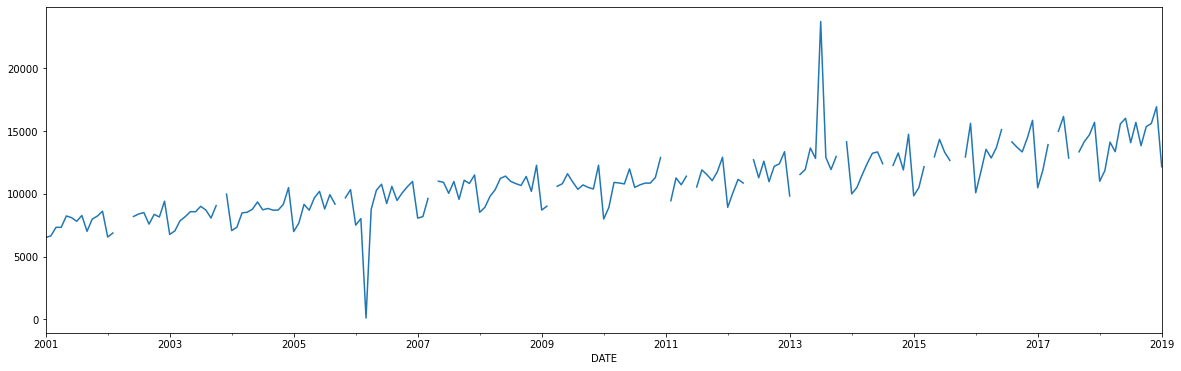

In [ ]:
mobile_sales.Sales.plot()

---

## Challenge 1: Handling missing values

So, as you can see, this is a plot that shows the monthly sales data.

Notice that there are some **missing values** in the data.






We need to
- Find where the values are missing
- Analyze if there is any pattern
- Fill them with the most appropriate value.

<br>

> **Q. How do we find the missing values?**

By now, we already know how to find missing values. We use the `isna()` method to get a sense of how many values are missing.

In [ ]:
mobile_sales.isna().sum()

Sales    19
dtype: int64

Let's try to see if there is any pattern in these 19 missing entries.

In [ ]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


There is no visible pattern.

So we can safely move forward, but if there was a pattern we would have handled that differently.

<br>

> **INTERACTION**
> - Can you suggest some ways to fill missing values? (mean, median, 0, etc)

<br>

### Imputing with Mean/Median
#### Q. How can we go about imputing the missing values?
One basic intuition is to fill these missing values with the **mean** or the **median** of the signal.

Let's look at both these values, and try filling up the missing values with them.

In [ ]:
mobile_sales.Sales.mean()

10842.757575757576

In [ ]:
mobile_sales.Sales.median()

10745.0

As you can see, both these values are similar, so we can safely assume that using either of these values to fill up the missing values would fetch similar results.

Let's try replacing missing values with the mean in this example and let's plot the same

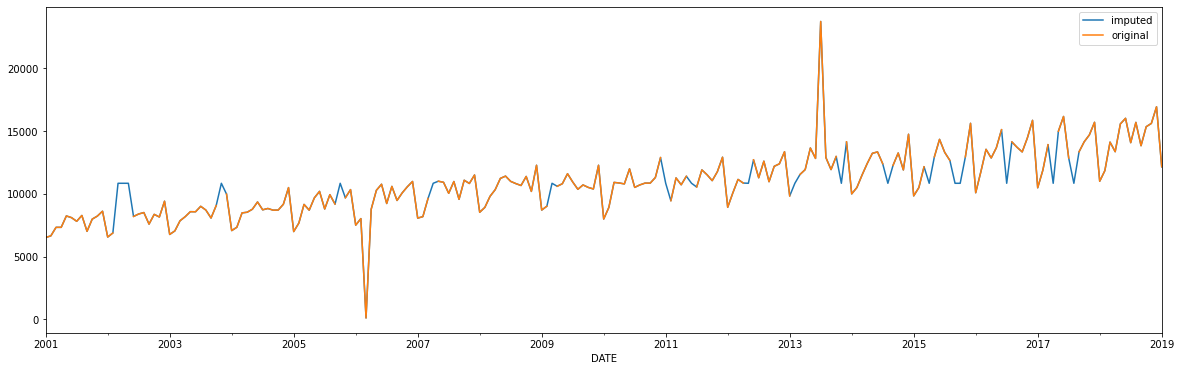

In [ ]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()




> **Q. Looking at the plot above, Do you think the values got imputed correctly?**

**No.**

Look at the plot for the year 2002
- The sales was in the range of 6,000-7,000
- We imputed the missing values with **mean of the entire data** across 18 years, i.e. 10k approx
- You can see how sharply this spike increases, in the plot to accomodate the same.
- Also notice that when the missing values gap ends, the value is in the range of roughly 8,000
- This again, causes a sharp decrease in the plot
- This doesn't feel right, and honestly a little forced.
- Certainly, the sales volume doesn't immediately increase to 10k for the months with missing data and then come back to a smaller scale, right as we get the original data.

This seems to be a **pattern for the early years** of data (2003, 2005)

![picture](https://drive.google.com/uc?export=view&id=1MOMa8PCPMEWrIqjjgc2a_CGe3gGaFKfm)


For year in the middle, 2007 to mid-2013, this imputation made sense.
- The sales have increased in scale now
- A sales value of 10k now doesn't seem like an anomaly.
- The plot seems to be smooth, and not forced.
- This makes sense, because we took mean of the entire time series, so it is expected to be somewhere in the center of the time series.

In the later years, from mid-2013, there seems to be another pattern
- Now, the imputations seem to be forced again.
- This time, it seems we're under estimating the sales.
- There is a sharp increase and decrease to incorporate our imputations.

<br>

**NOTE:** As stated above, even though we're looking at replacing missing values with mean, replacing with median would've also given the same result, as they have a similar value.

<br>


### Imputing with 0

> **Q. What if we impute by replacing the missing values with 0?**

**That doesn't make sense for this time series.**

The monthly sales of a mobile phone would not just drop to 0 on random months.

**But in many cases, this works very well.**

A lot of times, time series can be at a daily level, and it can happen that the sales for particular days is 0, owing to the store being closed on public holidays, or Sundays.

In industry, in order to do that, we need to first check in with the client who owns that data, to cross-check first without making assumptions.

This is very common practice.


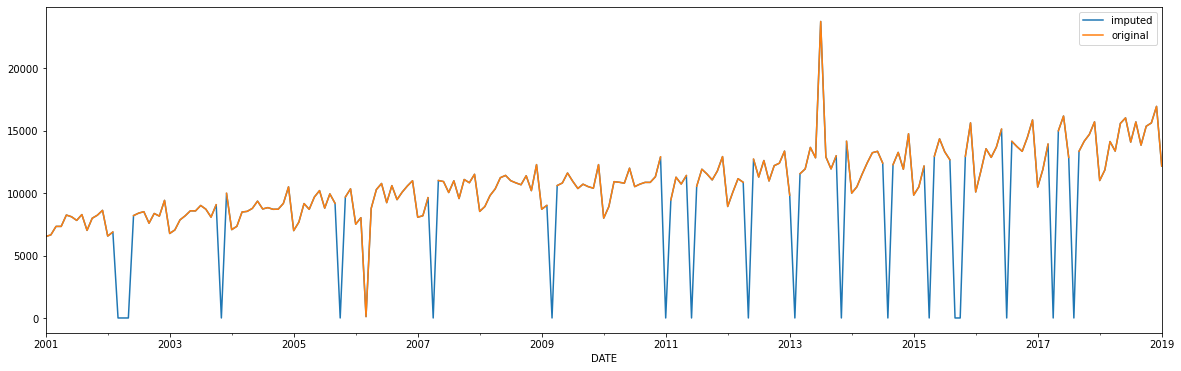

In [ ]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

### Interpolation

So, We can't replace with 0 also.

> **Q. Is there a better way to fill NaNs?**

Taking an average for the entire signal didn't work.

Lets try something else.

How about we take the **average of the first point before and first point after** the missing value and fill the missing value with this average.

- This makes sense, as this way, we would still be taking average, but instead of taking it for the entire signal, we take average for the specific gap in data.
- This will ensure that we're not under or over estimating the values.
- As the average value would be **unique** to each gap in signal.

For example,
- if we're missing data for February 2005,
- we can assume that the sales in that month would be an average of sales in January 2005 and March 2005.

![picture](https://drive.google.com/uc?export=view&id=1Lk-Km2n9Usx_V9ikYrlnVv0aqHDs8Meq)


This is called **Linear Interpolation**.

Let's apply this now.

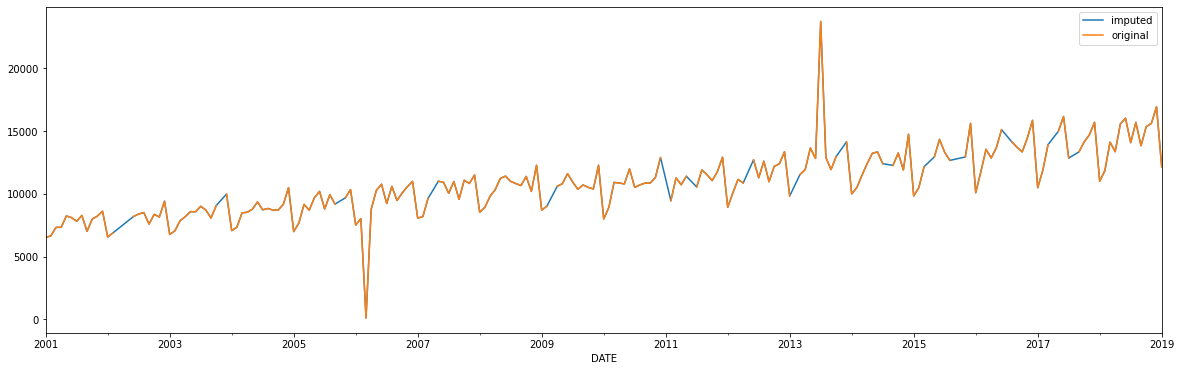

In [ ]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()


This looks better than the previous plot.

The imputed values don't seem to be forced.

We're essentially joining the first point before and first point after the missing values with a **straight line** in the plot.

**Other types of interpolations**

Besides linear, there exist other types of interpolation, some of them are:-
- `pad`: Fill in NaN using existing values
- `polynomial`: You need to specify an **order**

In [ ]:
# Let's save this interpolated signal

mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

> **Q. What if we expand this idea and take average value of n points before and n points after the missing value?**

This is the foundation of the idea of **Centered moving average**, we will look at this shortly.

In fact, interpolation could be called as centered moving average with a window size = 1. This will make more sense in a bit, when we study CMA.

![picture](https://drive.google.com/uc?export=view&id=1kp5Dr56RJgQbi9rAffcXN02K-oYZhsBI)


---

## Challenge 2: Anomalies

Lets look at the other issue in our data

> **Q. What is an anomaly in context to time series?**

Anomaly/outlier is an **abnormal or unsual data point** in the data set, which stands out of the data.

It can simply be seen as a **wrong entry** in the data, and that can happen at times.

Alternatively, it could be the correct entry but for a **one time event**, which is  not likely to repeat in future.

If it's a one time event, it's not going to repeat in the future, or at least, we cannot predict it getting repeated in the future.

So, even if it's a valid data, we would like to remove it from our training set, because we don't want our model to get biased by that one time event that is not going to happen again.

<br>

> **Q. What are the anomalies in our dataset?**

1. In Feb 2006 of our time series, we see a drastic dip.
 - There was probably no data for that month,
 - So owing to a different data engineering process, it got filled by 0
 - Giving us an anomaly.

2. Similarly, in mid 2013, we see an abnormal spike.
 - Even if this is correct data for that period, we want to remove it.
 - That is another anomaly in our data.




> **INTERACTION**
- Now that we've estalished that we have anomalies in our series, how can we remove them?
### Replacing with NaN

> **Q. What if we replace the points of anomaly with NaN?**

This does not work very well.

If we replace sales value by NaN, then for that date, we would not have any data. The model would not know what happened that month.

<br>

> **Q. Why is not having data for specific entries a problem?**

Most of our forecasting methods, as you'll see, rely on the time steps being equally spaced.

If we have a missing time step, the formula would still work, but we'd get an incorrect answer.

<br>


### Lets visualise our data to identify the outliers

One of the best way to identify the anomalies are by plotting **Histogram**

Let's plot one for our dataset

[]

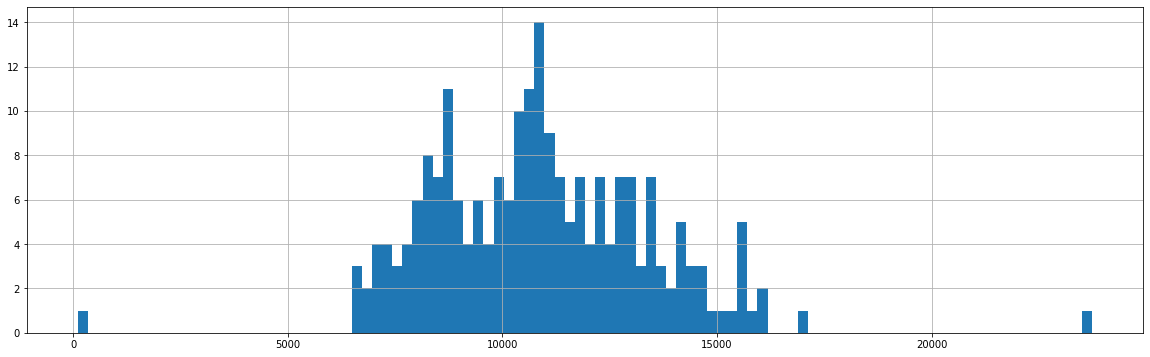

In [ ]:
mobile_sales.Sales.hist(bins=100).plot()

From the plot, we can clearly see the anomalies.

We can easily decide where to cut the data, in order to get rid of anomalies.
* For instance, We can replace all the $values < 5000$ by 5000 and all the $values > 20,000$ by 20,000

<br>

> **Q. But what would we do if this histogram plot was more continuous?**

Then we would not know where to cut the data.

<br>


### Using Quantiles
> **Q. What if we use the concept of quantiles to help deal with anomalies?**

This seems promising. Lets see how we'll go about it.

First lets describe the data to see the quantiles.

In [ ]:
mobile_sales.Sales.describe()

count      217.000000
mean     10873.046083
std       2571.620954
min        108.000000
25%       8923.000000
50%      10793.000000
75%      12555.500000
max      23740.000000
Name: Sales, dtype: float64

It makes sense to look at these values, as these are the most occuring values in the data.

> **Q. How do we determine anomalies using concept of percentile?**
Generally, we rule out an observation as an anomaly, if it is greater than 95 percentile, or less than 5 percentile.

![picture](https://drive.google.com/uc?export=view&id=11B3D9GEZUURHFr6YXY8uXB8f0l_3jnyy)

Let's find out these values.


In [ ]:
mobile_sales.Sales.quantile(0.95)

15164.599999999997

This means that 95% of the values in our signal are less than 15,164.6, or that only 5% values are higher than this value.

Similarly, lets find the value for 5 percentile

In [ ]:
mobile_sales.Sales.quantile(0.05)

7307.8

This means that only 5% of the values in our signal are less than 7307.8, or that about 95% values are higher than this value.

Using these values, we can cap them as the maximum and the minimum values of our series, respectively.

One way to do that using the `loc` method, as we have been doing till now.

Alternatively, we can utilise the `clip()` method in pandas. We need to assign values to parameters **upper** and **lower** to specify where to clip.

Lets look at a plot for the same as well.

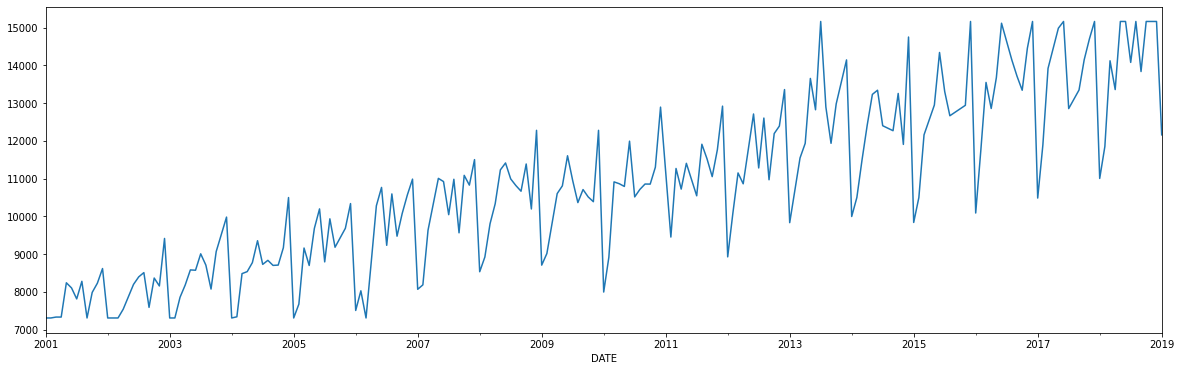

In [ ]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()

Notice that the scale for plot has changed now that outliers have been removed.

But as you can see in the beginning as well as in the end, some important values are also getting clipped.

> **Q. How do we solve the problem of useful data getting clipped?**

Let's change the percentiles that we're clipping on. - [98, 2]


**NOTE:**
- Try to keep the quantiles symmetric, if there's no reason to keep them non-symmteric.
- This means that if you're updating the upper bound as we did here, then update the lower bound accordingly.

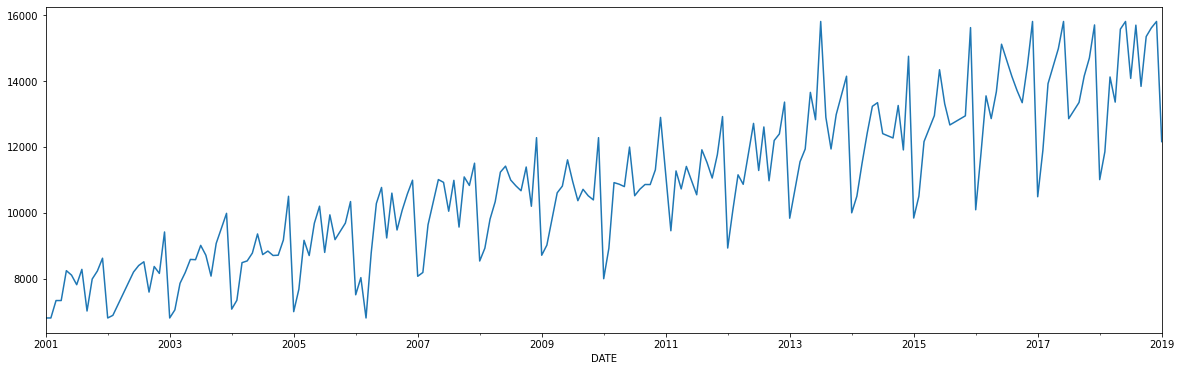

In [ ]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02)).plot()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))

---

## Task-1: Breaking down a time series


**Lets look at the Agenda 1 of our business case: Analyse and understand any patterns in the data**

Let's plot the same graph, just to have a look

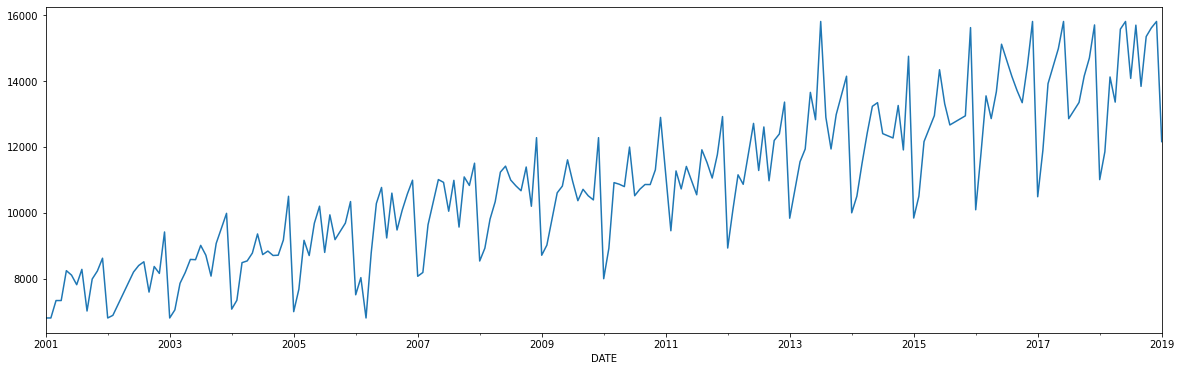

In [ ]:
mobile_sales.Sales.plot()

#### Q. What kind of information can we get by looking at the time series plot?
By observing the time series plot, we can now answer certain questions about the data:-
- Does it have a **trend**? Is it growing or decreasing?
 - We can see that the sales seem to be growing every year

- Is the brand making more revenue every year?
 - Yes

- Are there any **repeating patterns?**
 - There are repeating patterns
 - Some peaks and some minimas seem to be repeating themselves

<br>

> **Q. What do the repeating patterns indicate?**

This is **domain-specific**. Depends on what domain the time series is about.

For our use case, we can say that perhaps around Februray the trend seems to be that sales drop down. But they seem to pick up around October-December, perhaps due to the festive season.

A good forecaster should be aware of such trends in their domain, and why these trends occur.

For example,
- For a retail company, it would be expected to have spikes on Sunday, and perhaps a dip on Mondays.
- For a company manufacturing sweaters, it would be expected to see a spike in the months December-January (peak winter) and have a dip in the hotter months

![picture](https://drive.google.com/uc?export=view&id=1cGh2CYLsvJRIFCUm0RYS27Y3QkZ_61f3)


> **Can we seperate out trend and seasonality? Any Ideas?**

For that let us look at a new concept called **Moving Averages**

## Moving Averages




> **Q. What if we take average of the last two data points in our series ($x_{k-2}$ and $x_{k-1}$), and use it guess tha next point at t=k**

This seems like a smart approach.

This would ensure that we do not get a straight line for forecasts, and that the forecasted value is unique.

![picture](https://drive.google.com/uc?export=view&id=1UGjCaII3qnCOORJXDnD2aMYmYUaKVZKV)

<br>

Expanding on this approach,
> **Q. What if we take average of say, n past observations to give our forecast for time t=k?**

This approach is called as **Moving Average**.

The value of n acts as a hyperparameter, that we can set based on what works best for us.

The following plot shows the moving average for n=3, 7 and 10


![picture](https://drive.google.com/uc?export=view&id=1B07wbt9Aqs_JAFUcYzVTdXCC8ggtbJKZ)

<br>

> **Q. Why is it called "Moving" average?**

- To predict the value at time $t+1$, we take average for values from time $t-n$ to $t$
- Similarly, to predict the value at time $t+2$, we take average for values from time $t+1-n$ to $t+1$

... and so on

Since we fix the window size as $n$, the window will move as we move to forecast values.

<br>


> **Q. What does a Moving Average time series look like?**

The Moving Average time series just has a **phase difference** with the actual time series, as it is constantly taking averages of the past points

<br>

![picture](https://drive.google.com/uc?export=view&id=1Q_B41dwFj056FFmpvay-a0g86yyPvIde)


<br>

> **Q. What are the characteristics of Moving Averages?**

- As our time series goes up, the moving average also goes up. Conversely, when the time series go down the moving average also goes down

- This way, it can **respond to new changes quickly**.

- This is the benefit of Moving averages. We don't get this advantage with any other method.


### Math of  Moving Averages

> **Q. How do we formualate the Moving averages mathematically?**

Before we dive into math, let's fix some notations that we will use throughout time series. Let <br>
$y$ -> Current/Actual value <br>
$ŷ$ -> Forecasted value <br>
$m$ -> Number of observations

Let's formulate the Moving Averages concept.

$ŷ_{t} = \frac{y_{t-1} + y_{t-2} + y_{t-3} + ...y_{t-m} }{m}$

This can also be written as,
$ŷ_{t} = \frac{1}{m}∑_{j=t-m}^{t-1}y_{j}$




![picture](https://drive.google.com/uc?export=view&id=1DYh43urHGBSrZNEztHS41vTeiYdax1oQ)

### Weighted Moving Average (WMA)



As of now, we're giving all the previous observations equal weights, while calculating the average.

> **Q. What if we assign different weights to different observations?**

This is a smarter extension of the Moving Averages idea. This is called **Weighted Moving Average (WMA)**.

A Weighted Moving Average puts **more weight on recent data** and **less on past data**.

This is done by multiplying each observation point by a **weighting factor**.

Because of its unique calculation, WMA will follow the data more closely than a corresponding Simple Moving Average.

<br>

> **Q. How do we formulate WMA?**

 $ŷ_{t} = \frac{a_1 * y_{t-1} + a_2 * y_{t-2} + a_3 * y_{t-3} +...a_m * y_{t-m} }{a_1+a_2+....a_m}$

 Alternately, we can write this as,

$ŷ_{t}  = \frac{∑_{j=1}^{m} a_j * y_{t-j} }{∑_{i=1}^{m}a_i }$

Naturally, we will have the following relation between the weights:
$a_1 > a_2 > a_3 > ... > a_m$


![picture](https://drive.google.com/uc?export=view&id=1j_mdl_MAZF6LIryDNmqkIlPbVkzyUxw8)

<br>

> **Q. Why do we divide weighted sum with sum of weights?**

This way, the result gets **normalised**, and the forecasts are not much higher than the series data.

<br>

> **Q. Isn't WMA very similar to regression?**

In WMA, we have essentially made the past $m$ values as **features**, and we have $a_1, a_2, ..., a_m$ as **weights** to these values.

And using these features and weights, we're training a regression model to predict values for new cases.

- We are **manually** assigning these weights with the contraint: $a_1 > a_2 > a_3 > ... > a_m$

![picture](https://drive.google.com/uc?export=view&id=1U5CX1sXJtRLblKXd0XRloQ3ArLaieXcO)


But there is nothing stopping us from using **auto computed** weights.

This is the fundamental idea behind the technique of **Auto Regression**. We will explore this idea more in the next lecture.

![picture](https://drive.google.com/uc?export=view&id=1iab82gLrn2EdNWniun5IbmgIplZfK5YF)

### Q. How can we implement the concept of Moving averages in code?
We utilize the `rolling()` method available in **pandas** library.

This is a very convenient function available to us.

<br>

> **Q. How do we use the rolling() method of pandas?**

This method provides the feature of **rolling window calculations**.

In very simple words we take a **window size** of k at a time and perform some desired mathematical operation on it.

<br>

> **Q. What does the window size signify?**

A window of size k means we perform some desired mathematical operation on k consecutive values at a time.

In a very simple case, all the ‘k’ values are equally weighted.

<br>

> **Q. What is the desired mathematical operation to be performed over rolled data, in order to implement Moving Averages?**

We use the `mean()` function on the rolled result in order to implement Moving Averages.

<br>

Now, let's plot the graph for these moving averages and actual values


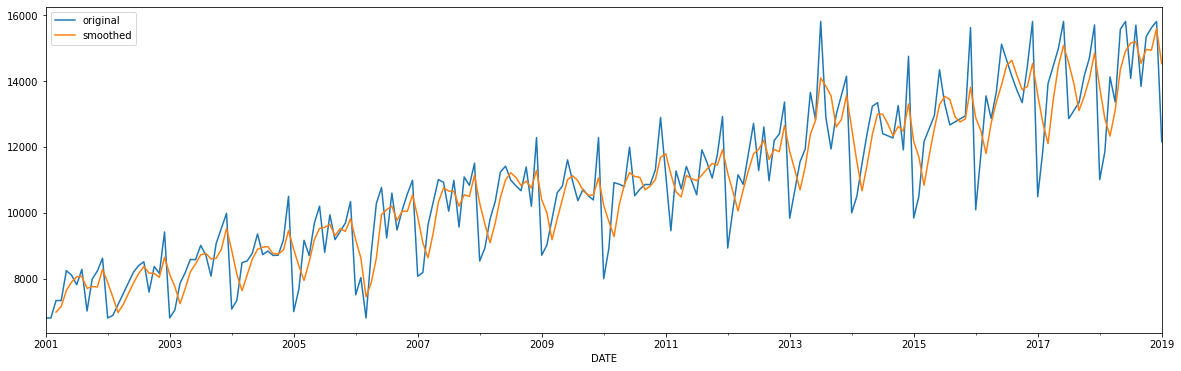

In [ ]:
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(3, center=False).mean().plot(label='smoothed')

plt.legend()

> **Q. What observations can we make from this plot?**

- We can see that the smoothed series is **lagging**.
- Notice that both maximas and minimas are lagging by 3 units along x axis. This is because our rolling window was 3.
 - Benefit of this is, if the time series value changes suddenly, the smoothed series would change a few days/weeks/months later.
 - Thereby, adjusting to the new level.
- **Less-spikey**
- Notice that there are some **missing values in the beginning**
 - This makes sense, since our `window size=3`, the very first MA value we can get is after 3 data points.

<br>

> **Q. What if we take window size = 1?**

In this case, the smoothed series should be exactly same as the original time series.

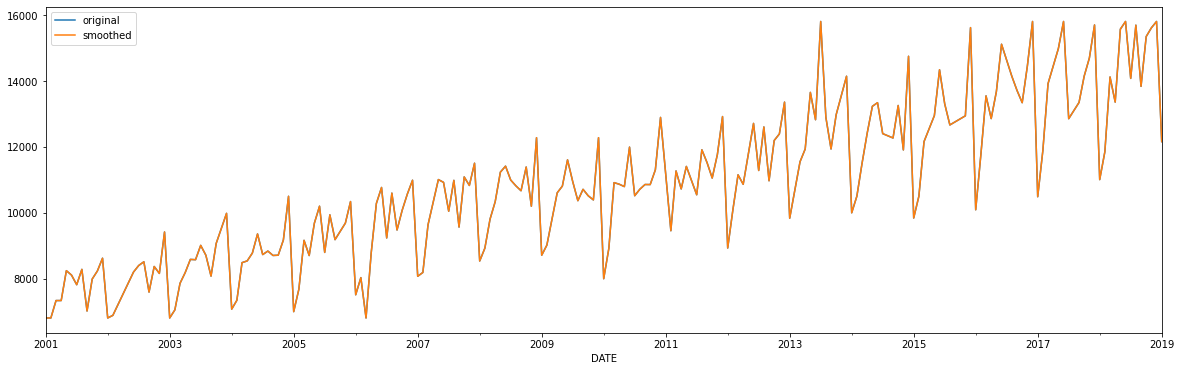

In [ ]:
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(1, center=False).mean().plot(label='smoothed')

plt.legend()

> **Q. What would happen if we take a higher window size value?**

- It would go through the center.

- The results would be **much less noisy** in nature.
- We would be missing 12 values from the beginning of MA plot line

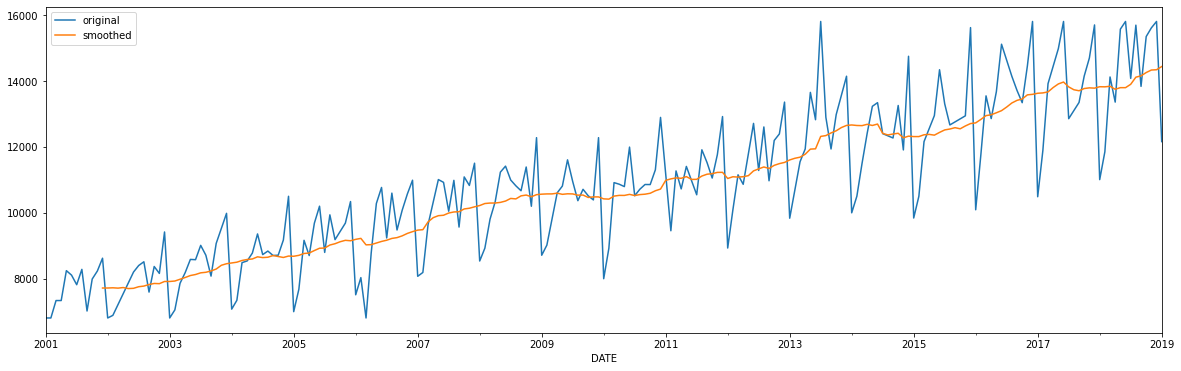

In [ ]:
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(12, center=False).mean().plot(label='smoothed')

plt.legend()



This is what a **Trend line** looks like.

<br>

The value of 12 makes sense for window size since this is monthly data. So, there is some hope that it might repeat every year.


### Centered Moving Average

#### As we discussed earlier, we can use this approach of Centred Moving Average to
- deal with missing values
- deal with anomalies in time series data.

Let's see how it works

> **Q. Can we adopt a more centered approach for Moving Averages?**

Yes and No.

Theoretically, instead of taking average of the last n data points, we can take average of n points **before** the current point, and n points **after** the current point.

This is the **centered approach**.

Naturally, we can't use this in forecasting as the future values are not available.

However, if we are just smoothing as preprocessing, we can adopt this centered approach.


![picture](https://drive.google.com/uc?export=view&id=1_2gYUa8VrGJaVQLHpX5o6hPX_gvpxgSP)

<br>

> **Q. How is the centered approach of Moving Averages formulated?**

Depending on context, if we're considering all points from $y_{t-m}, y_{t-m+1}, ..., y_{t}, ..., y_{t+m-1}, y_{t+m}$

It can be formulated as the following:-

$ŷ_{t} = \frac{1}{2m+1}∑_{j=t-m}^{t+m}y_{j}$

Although, if we do not take the point at $y_t$ into account, the formulation becomes:-

$ŷ_{t} = \frac{1}{2m}∑_{j=t-m, j \neq t}^{t+m}y_{j}$


![picture](https://drive.google.com/uc?export=view&id=14guCcgHqYLMr9x0Be1geSGo1H4udhoOk)

<br>

> **Q. What changes do we need to make in code to implement centered approach of Moving Averages?**

In order to do this, we just need to add the value of parameter `center` as `True` inside the `rolling()` method.

Let's see the plot for the centered approach

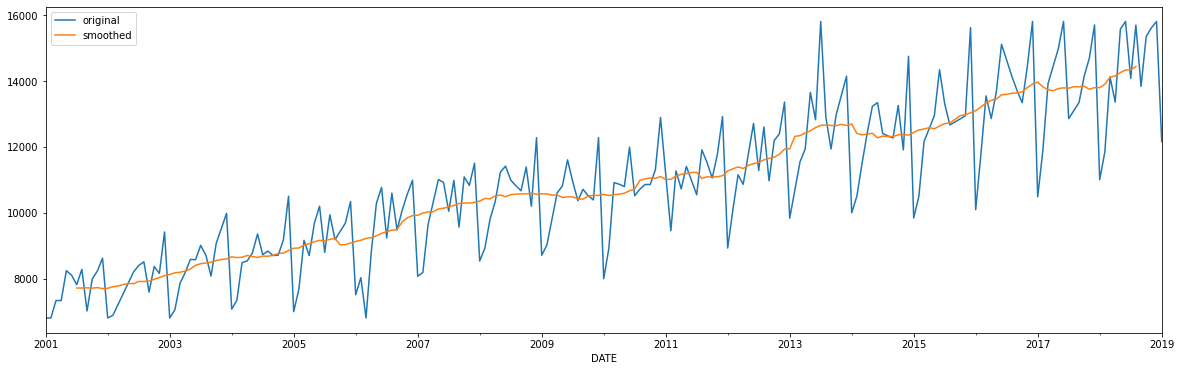

In [ ]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12, center=True).mean().plot(label='smoothed')
plt.legend()

> **Q. What observations can we make from the plot?**

Notice that some values are missing in the beginning and in the end.

We're missing 6 entries in both beginning and in end to be precise, since the window size is 12.

<br>

> **Q. What if we put `center=False` inside the rolling method?**

In that case, we would find that we're missing all 12 values in the beginning, and none in the end.



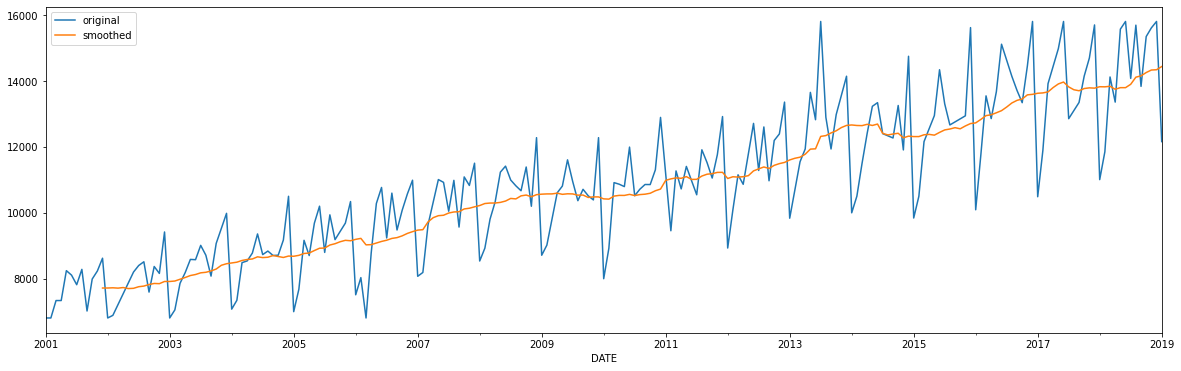

In [ ]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12, center=False).mean().plot(label='smoothed')
plt.legend()

---

## Trend



> **Q. What is meant by trend in a time series?**

Trend can be thought of as the linear **increasing or decreasing behavior** of the series over a long period of time.

When we say that a time series is increasing or decreasing, we're actually talking about it's trend.

A trend can be:-
- Uptrend
- Downtrend
- Can be up and down, need not be a straight line

![picture](https://drive.google.com/uc?export=view&id=1iHjGgICskAc6F6YFKWsheSlizoZzT1Ps)


<br>

> **Q. Is trend fixed for a time series?**

**No.**

Trend usually happens for some time and then disappears, it does not repeat.

For example, some new song comes, it goes trending for a while, and then disappears.

Sometimes we refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend, or vice versa.

<br>

#### Q. What is a trend line?
Assumming that trend is not repeating, Trend line is a **smooth predictable function** that traces the trend of a time series, and can help us predict the time series indefinitely in the future.

The term "line" is misleading as it may or may not be linear.

For example, the following graph depicts a series in which there is an obvious upward trend over time. The trend line for this series is shown in blue.

![picture](https://drive.google.com/uc?export=view&id=1REvT8-4CZjXW6mK7LVBd49y1LxQQIqPv)

<br>

> **Q. Can we have more than one trend lines for a time series?**

**No.**

If we had more than one trend lines for a time series, they would just add up to result a single trend line.

**Note:** Since trend lines have directions, they would be undergo **vector addition**, to give the resultant trend line.

#### Q. How can we calculate the trend of a time series?

This can be calculated by taking rolling average over a long period of time.



>**Calculating Trend**

1. We already saw one way of calculating the trend line, by using `mean()` method over `pandas.rolling()` by fixing appropriate window size.
 - For our usecase, since we're looking at monthly data, 12 is a good window size

![picture](https://drive.google.com/uc?export=view&id=1-QjmdPpOhbhj9D0g-xQdYiGCqFwP63Hs)


This is nothing but smoothing the original time series. We Hvae chosen to take centered moving average to represent trend this choice can be subjective

You can take period to be 1 year or 2 years. It should be big enough to remove (smooth) all the other factors such as noise / seasoanlity / etc.

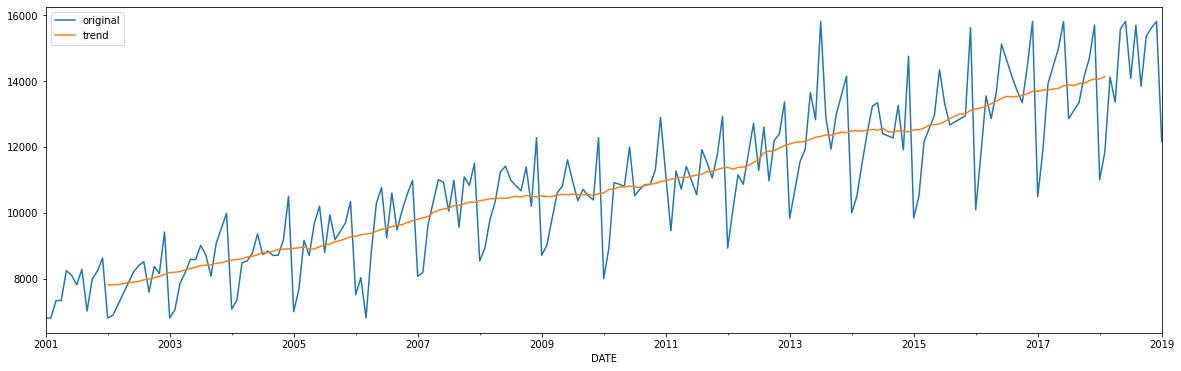

In [ ]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(24, center=True).mean().plot(label='trend')

plt.legend()

2. Another way of calculating trend is to just **fit Linear Regression** on these points.

 - This seems quite intuitive.

 - Recall Linear Regression lecture.

 - Here, our independant variable is time (t), so suppose it ranges from 0 to m, and is equally spaced, our formula for regression becomes:

 - $\hat{y}_{t+1} = mt + c$, where c is a constant.

This becomes our trend line!

![picture](https://drive.google.com/uc?export=view&id=1wcV0HkPJLlC517ylPbTOJ9y5YOJ3oRqk)

**NOTE:**
- If instead of a linear, we want a parabolic trend line, then instead of fitting a polynomial of degree 1, fit a polynomial of degree 2
- **scipy** and **numpy** have `polyfit()` commands using which we can fit any order curve, to any number of points.


> **Q. Is there any constraint to the value of trend?**

Recall that trend may or may not be a straight line. It is a smooth predictable function.

There's only one constraint.

Trend **cannot be periodic**.

Because if it is periodic, then that means there is some seasonality component present within the trend. So, we will have to separate that, in order to have a **pure trend**.


---

## Seasonality

> **Q. What is seasonality in times series?**

Seasonality in time-series data refers to a **pattern** that occurs at a **regular interval**.

It can be called just a simple repeating wave.

Making copies of seasonality can fetch us our time series.

Seasonality is always of a **fixed and known period**.

In fact, our assumption that we can predict a time series, is due to the fact that it is repeatable.

<br>

> **Q. When do we see seasonality?**

A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week.

- Hourly pattern
 - People would tend to buy mobile phones during specific working hours
 - We can expect an increase in sales in the evening
 - There would be different patterns observed in morning and at night.

- Weekly pattern
 - Sales would be higher on week ends, and less on weekdays

- Weather pattern
 - This is category based, meaning that would be evident for specific categories. For ex:
 - Sweaters would have higher sales in winters, and sunglasses would have a higher sale in summers, and so on..

- Yearly Pattern
 - There would also be a yearly pattern. This is influenced by the holiday season.
 - Sales would shoot up during holidays like Diwali, Christmas

![picture](https://drive.google.com/uc?export=view&id=1J-hqnbdhR2txSZXKRZdFdnjBTbrRl1OJ)

![picture](https://drive.google.com/uc?export=view&id=18LzlrgT9QoEVTzYiQlRfBZxmL1S18et1)

<br>

> **Q. How do we identify seasonality?**
Seasonality in a time series can be identified by regularly spaced peaks and troughs which have a consistent direction and approximately the same magnitude every year, relative to the trend.

The following diagram depicts a strongly seasonal series.


![picture](https://drive.google.com/uc?export=view&id=1eJhLgAEG6n8yFeqfkapAlbhLqQAuOo5t)

There is an obvious large seasonal increase in December retail sales in New South Wales due to Christmas shopping.

In this example, the magnitude of the seasonal component increases over time, as does the trend.

<br>

> **Q. Can we have more than one seasonality?**

**Yes.**

Consider the time series given below.


![picture](https://drive.google.com/uc?export=view&id=1iSxJllEaow0rxs4CdXNoFWBQ0w3YlT1A)

This time series actually has a short term (shown in red) and a long term seasonality (shown in blue). The trend for this series is shown in green.

![picture](https://drive.google.com/uc?export=view&id=1qhrJ7dFgZEHKBCmkq0n_98vQwemmtOWr)

This behaviour can be expected in real life data as well.

For example, in context to retail sales,
- We can have a short term seasonality: More sales on Sunday
- We can also have a long term seasonality: More sales on Festive seasons (October-December).


#### Q. How can we calculate seasonality?

- **Step-1**: Calculate trend and subtranct it from the original time series
- **Step-2**: From the result, take the avergae of all periods. For eg:
  - If it is monthly time series for 4 years, then you have 4 Jan, 4 Feb, 4 Dec etc.
  - Take the avg of all Jans, Febs, etc.


![picture](https://drive.google.com/uc?export=view&id=1lGCQmq5t5hHaqZHWcMt3_SIeF-JXbXPh)

<br>

So we can easily calculate it manually. But lets see how this can be done using statsmodels




---

## Time series Decomposition

Generally, a complex formula or equation can be broken down into simple equations. For instance, concepts of Fourier transforms, Neural Networks, etc.

We've already studied about two components of a time series: Trend and Seasonality.

> **Q. Can we break down our time series into it's components?**

**Yes**. This process is called **Time Series Decomposition**.

A time series is made up of **simple components** which we can estimate
 * **Trend**
 * **Seasonality**


These are the two important components which we want to decompose our signal into

This is also called as **Error Trend Seasonality Decomposition**


![picture](https://drive.google.com/uc?export=view&id=1EModXa7aurPqlkWe4BA14j2FB31EXMFE)

<br>





> **Q. If we add the trend and seasonality of a time series, will we obtain the original time series?**

In an ideal situation, yes.

But we know that in real life, we hardly get ideal cases.

Practically, we will also have **noise/error/residual** in the data.

This prevents the time series from being a perfect sum of trend and seasonality. It is not a perfect function.

<br>

#### Q. How is the Time series decomposition formulated?
$y(t) = b(t) + s(t) + e(t)$ <br>
Where,<br>
$b(t)$ -> trend of signal <br>
$s(t)$ -> seasonality <br>
$e(t)$ -> error term<br>

![picture](https://drive.google.com/uc?export=view&id=1_0AJW8_mb26q1h1SeiYPnoHaFPMvwsFb)

<br>

> **We can relate the concept of Time Series Decomposition to linear regression.**

- Consider we have d independent features: $x_1, x_2, ..., x_d$
- Consider we have weights values: $w_0, w_1, w_2, ..., w_d$
- and an irreducible error: $b$

Then the formulation of linear regression becomes:-
$y_i = w_0 + w_1 x_{i1} + w_2 x_{i2} + ... + w_k x_{ik} + w_{k+1} x_{i(k+1)}  + ... w_d x_{id} + b_i$

- We can say that the terms $w_1 x_{i1} + w_2 x_{i2} + ... + w_k x_{ik}$ represent the **trend** of time series: $b(t)$
- And that the terms $ w_{k+1} x_{i(k+1)}  + ... w_d x_{id}$ represent the **seasonality** of time series: $s(t)$
- The terms $w_0 + b_i$ together constitute the **error/residual** value of time series: $e(t)$

![picture](https://drive.google.com/uc?export=view&id=1voYFBZ4ao-ZPMHRylQajYF_dV1xobvY3)

### Residual


> **Q. How can we calculate the residual values?**

Error term is just computed as <br>$e(t) = y(t) - b(t) - s(t) $ <br>

![picture](https://drive.google.com/uc?export=view&id=1_PXnsF-W46P_r6dyMAcwJa9OyYLFY-Qh)

It is not estimated, though it can be computed using the same formulation.

It is based on the real values that we have.

<br>

> **Q. What does the error term look like on plotting?**

Assuming that the trend and seasonality components obtained are a good estimate, then the errors would be small and would be scattered around zero.

If we look at a histogram of errors, there are two possibilities
- We observe a **narrow normal distribution** along the y-axis
 - This is good. Means that we do not need to worry about errors.
 - **Smaller the standard deviation, the better!**

- We observe a **skewed distribution**
 - This means we're missing a constant term in our formulation.
 - Implies, $y(t) = b(t) + s(t) + e(t) + c$, where c is constant term.


![picture](https://drive.google.com/uc?export=view&id=1p-gMnO_g2VBB2bWa42xNN-SDTu4rBsV3)

<br>

> **Q. Can the residual values have any pattern in their plot? If yes, then in what cases?**

**Yes.**

Sometimes the residuals might have a trend and/or seasonality.

This can happen when
- We had multiple seasonalities in the time series
- Or, if the trend detection was incorrect.

<br>

> **Q. What should we do if a pattern exists in residual values?**

In such a case, we treat the residual values as a **separate/new time series**, and then try to forecast this new time series, by decomposing it into it's own trend, seasonality and error terms.

This creates a **"nested forecast"** of sorts.

If we again obtain a residual term that has a pattern, we further treat that as the new series.

All these nested models can be very different from each other.

<br>

> **Q. How will we formulate this case mathematically?**

Consider that we're forecasting a time series A, so we have

$y_A(t) = b_A(t) + s_A(t) + e_A(t)$

It is found that residual term for signal A, $e_A(t)$ has a pattern of it's own.

So, we break down $e_A(t)$ further by treating it as a new time series, lets call it series B. So formulation becomes:

$y_A(t) = b_A(t) + s_A(t) + b_B(t) + s_B(t) + e_B(t)$

This can go on further, based on the nature of $e_B(t)$.

![picture](https://drive.google.com/uc?export=view&id=1eVmps13OwhQjPHhmVPSUZuDEA8iFxLZi)



### Multiplicative seasonality and Additive seasonality

As of now, we've learnt the following formulation of Time Series Decomposition $y(t) = b(t) + s(t) + e(t)$

This is known as the **Additive Seasonality Decomposition**.

<br>

Consider that we have a time series in which the amplitude of the seasonal component is increasing with increasing trend.

![picture](https://drive.google.com/uc?export=view&id=1NDqiJZLVJBv3quZl3Pv8RoZzgvA1Zv8h)


> **Q.  Would Additive Seasonality Decomposition still work?**

**No.**

In this case, we will not obtain the time series by adding the trend and seasonality components with each other, as per our specifications.

<br>

> **Q. How can we accomodate for this increasing amplitude in the seasonality component?**

Instead of adding the trend and seasonality components, if we **multiply** them, then we would obtain a time series in which the amplitude of the seasonal component is increasing with increasing trend.

This is called **Multiplicative Seasonality Decomposition**.


It can be written as

 $y(t) = b(t)*s(t) * e(t)$

 $e(t) = \frac{y(t)}{b(t)*s(t)}$

![picture](https://drive.google.com/uc?export=view&id=1YZoUMTdvtgqZxIXVgo_jAC5YRAMubM_a)


<br>

> **Q. Is there any realation between additive and multiplicative model?**

Consider the multiplicative model:  $y(t) = b(t)*s(t) * e(t)$

If we take **log transform** of both sides, we get a form of the additive model:  $log(y(t)) = log(b(t)) + log(s(t)) + log(e(t))$

![picture](https://drive.google.com/uc?export=view&id=1nlCvKH3IibhCXSnaOqH9gJuugv_OCqEH)


<br>

#### Visualization for Multiplicative vs Additional Seasonality
![picture](https://drive.google.com/uc?export=view&id=1Ao7LIcnQg-nkYm1z_m2bFWi49vlvcGXG)


---

#### Implementation of Multiplicative and Additional Seasonality


> **Q. How do we code this in Python?**

We utilize the **statsmodel** library of Python, which contains many useful functionalities for time series.

We have a built in function for seasonal decompose, where we need to specify the target values, and the model we wish to adopt (additive or multiplicative).

In [ ]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

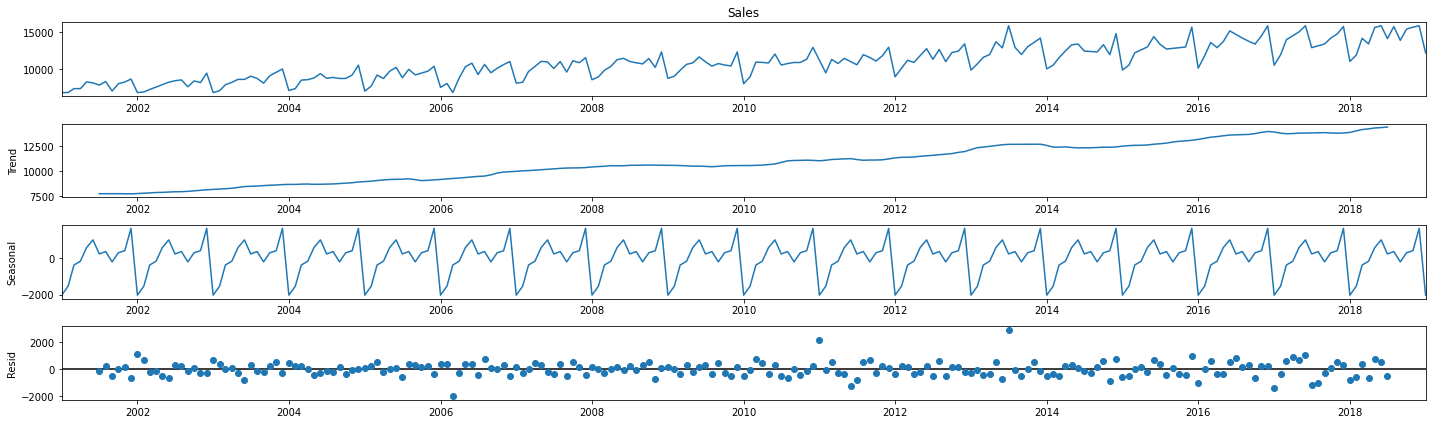

In [ ]:
# By default, we get the plot twice with this functionality
# We add ; to avoid seeing the plot

model.plot();

This plot is divided in 4 sections
1. The actual time series data
2. Trend
 - Notice the missing values in beginnning and end
 - Even statsmodel has used centered approach to calculate moving average
3. Seasonality
 - We can see that the exact same pattern is getting repeated every year.
 - This was obtained by subtracting trend from real series, and taking average over every month.
4. Residual values

<br>


Coming back to the additive model, lets take a look at the residuals plot only.

> **Q. How can we retrieve ONLY the residual plot from the model?**

We can simply use `resid` keyword to access residual values from the model, and then plot it.

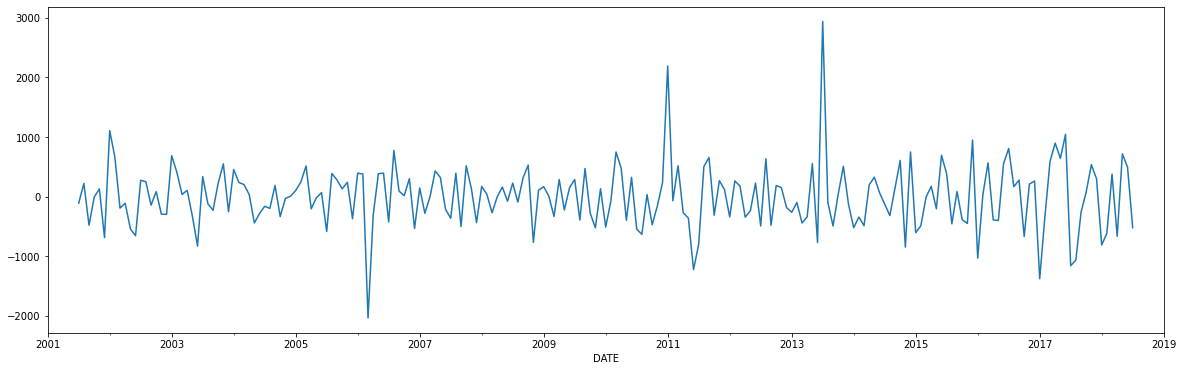

In [ ]:
model.resid.plot()

You may think that this is a new time series, and then might want to forecast for this as well.
- But notice the minimum and maximum errors we're getting here (-2000 and 3000 respectively). **Scale of the residuals is ~5% of the actuals**

> **Q. How can we check if this error is symmetric?**

We can plot a histogram for residuals, to understand the distribution of these values.

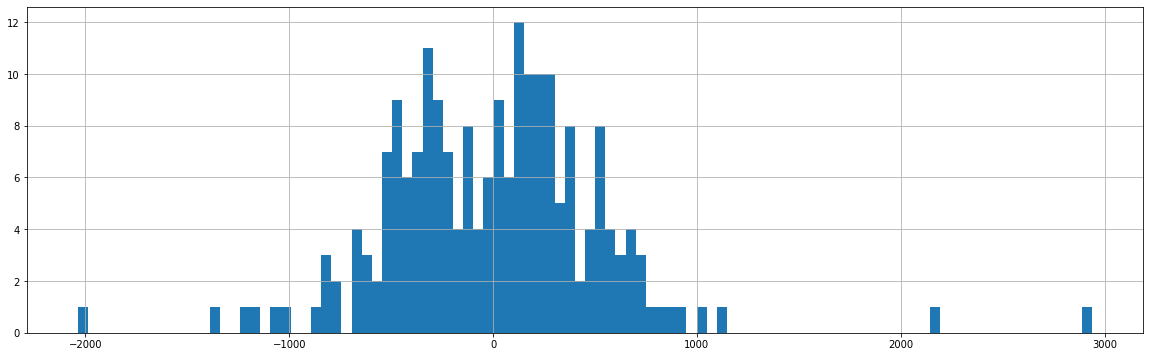

In [ ]:
model.resid.hist(bins=100)

This still doesn't look perfectly symmetric

> **Q. How do we know when to not take further forecast of the residuals?**

We can stop the forecasting of the residual once your residual mean is close to zero.

Let's check this value for our usecase.


In [ ]:
model.resid.mean()


-3.2316417029771514

In a data with values ranging from -2000 to 3000, a residual mean of -3.2 is very close to zero.

So we are neither overforecasting nor underforecasting.

### Decomposition from Scratch

**Trend_temp**

<AxesSubplot:xlabel='DATE'>

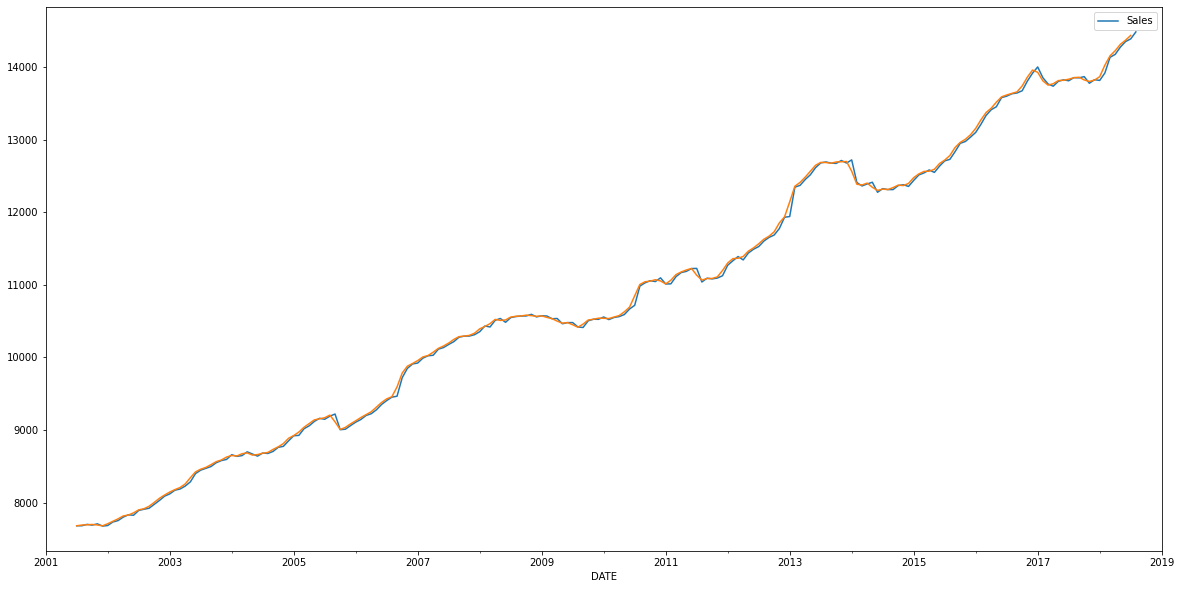

In [ ]:
trend = mobile_sales.rolling(12, center=True).mean()
trend.plot()
model.trend.plot()

<AxesSubplot:xlabel='DATE'>

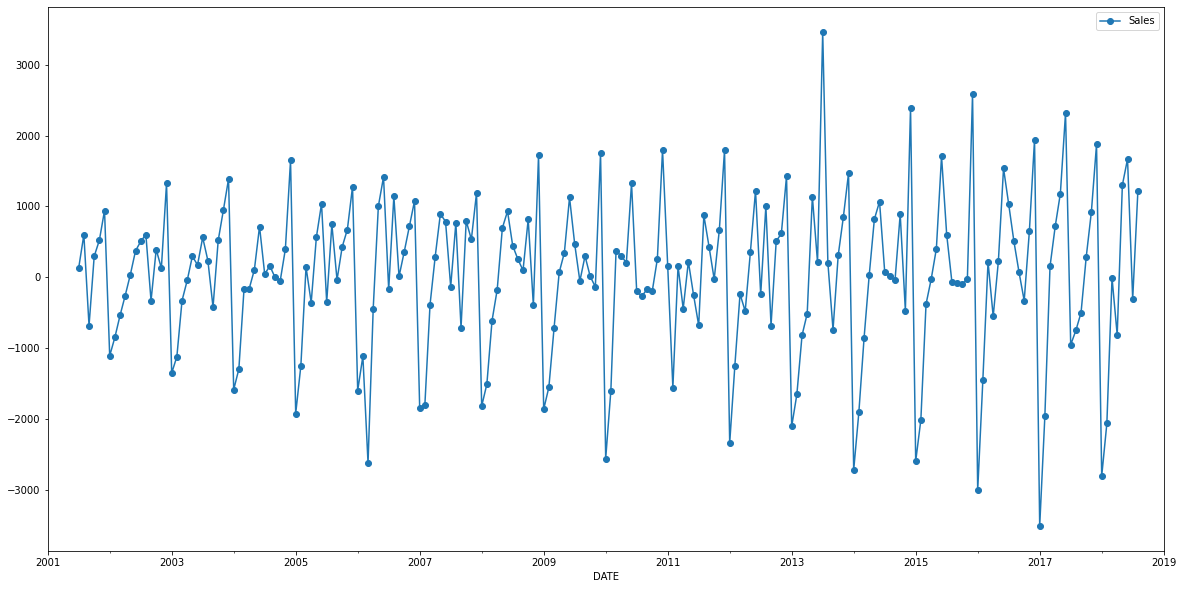

In [ ]:
de_trend = mobile_sales - trend
de_trend.plot(style='-o')

<AxesSubplot:xlabel='DATE'>

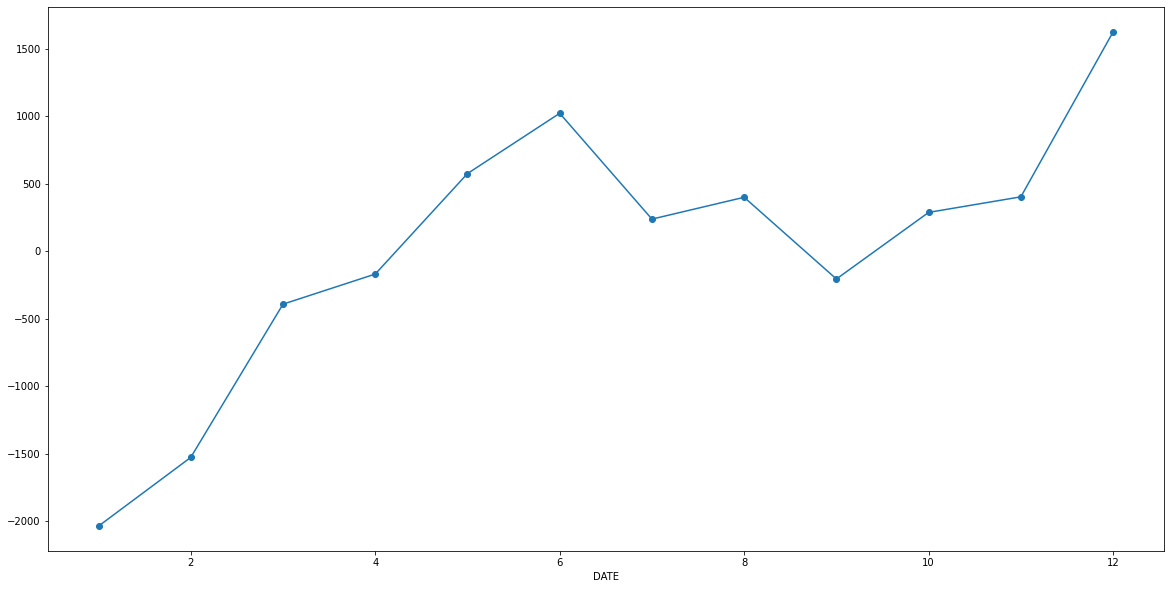

In [ ]:
dtf = de_trend.reset_index()
dtf.groupby(dtf.DATE.dt.month)['Sales'].mean().plot(style='-o')

<AxesSubplot:xlabel='DATE'>

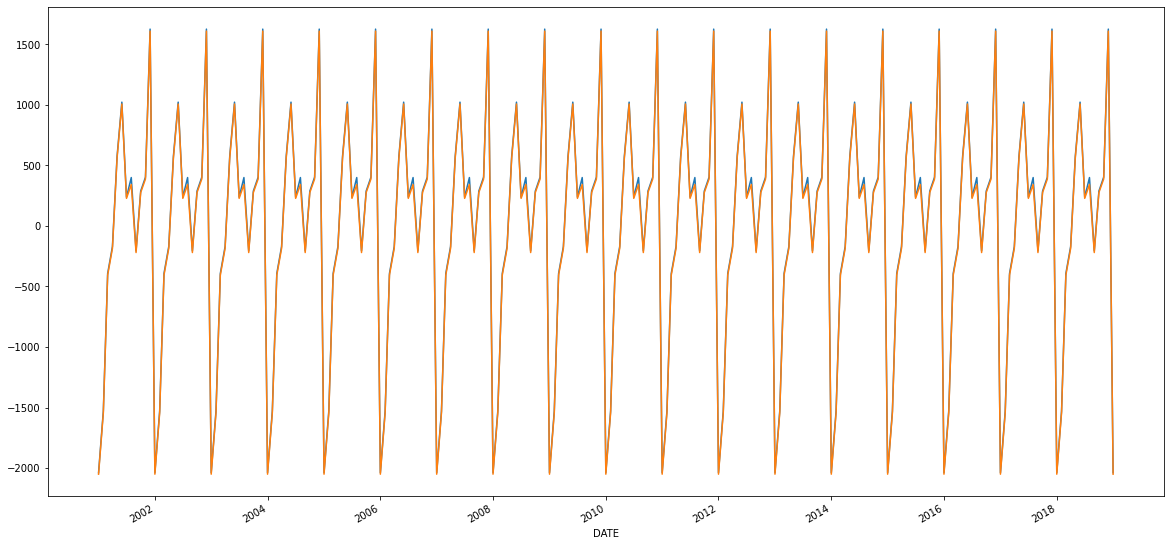

In [ ]:
plt.plot(dtf.DATE, dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean'))
model.seasonal.plot()

<AxesSubplot:>

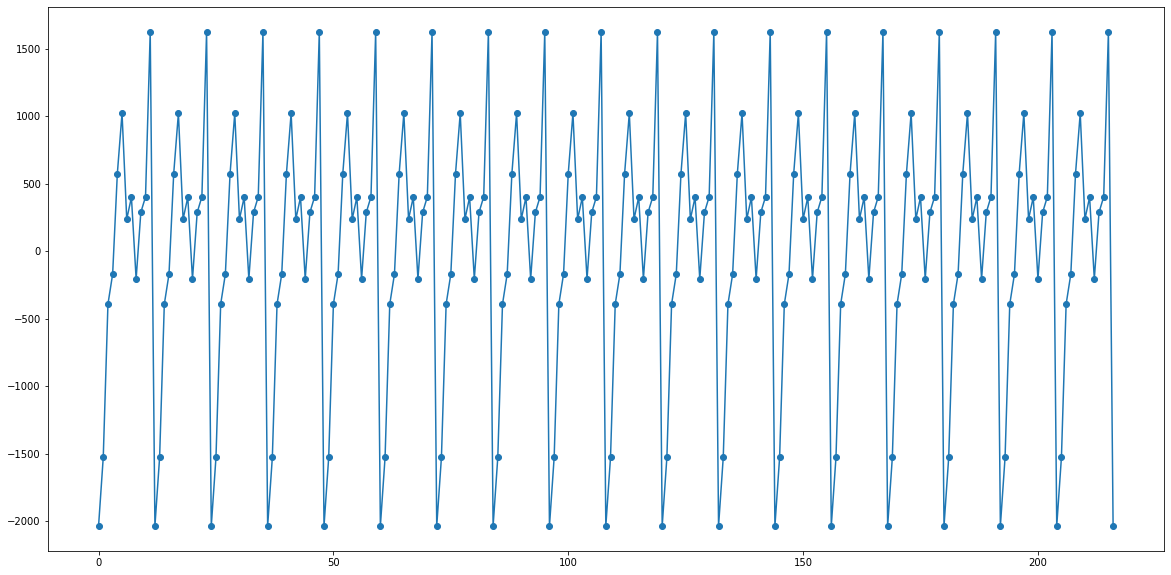

In [ ]:
dtf['season'] = dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean')
dtf['season'].plot(style='-o')

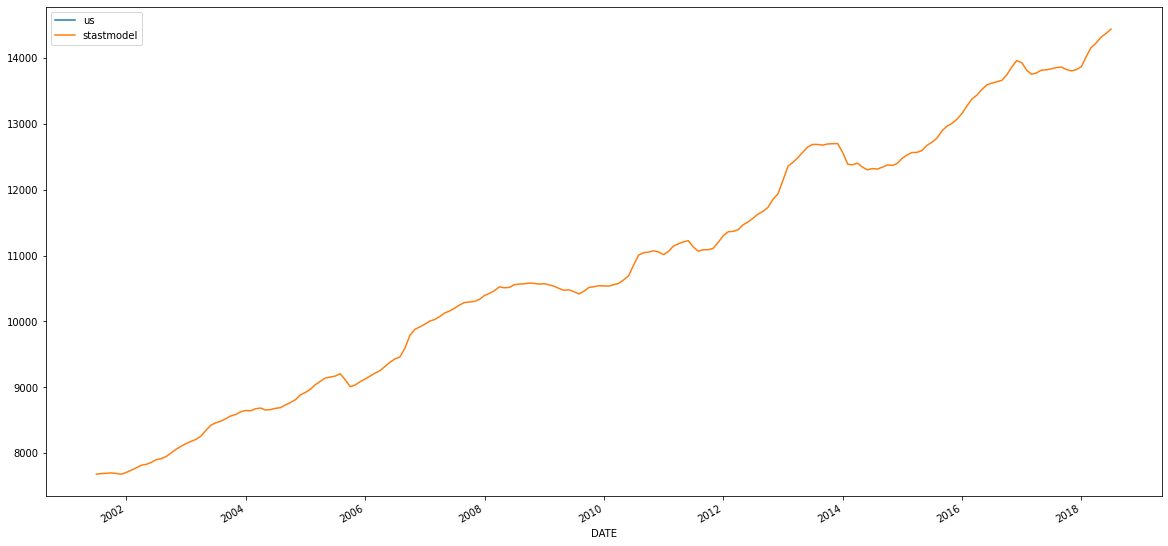

In [ ]:
trend_2 = pd.Series((mobile_sales.values[:, 0] - dtf['season']).rolling(12, center=True).mean(), index=model.trend.index)
plt.plot(trend_2, label='us')
model.trend.plot(label='stastmodel')
plt.legend()

## Task-2: Generating Forecasts

**Lets tackle the Agenda 2 of our buisness case: Make future forecasts, with a MAPE score not more than 5%.**

We would need to see a few things before we can begin
- What is MAPE
- How to do train-test splits for time series


### Mean Absolute Percentage Error (MAPE)

To get the percentage error values we use **Mean Absolute Percentage Error** (MAPE), which is obtained by dividing the absolute error with actual value and finding the mean of these terms.

Formula:


<center><h3> $MAPE = \frac{1}{N} \sum_{i=1}^{N}\left | \frac{y_{i}-\hat{y}_{i}}{y_i} \right |$</h3></center>



> **Q. What is advantage of of using MAPE  as business case metric?**

As opposed to other metrics used for time series (ME, MAE, MSE, RMSE), MAPE doesn't provide relative comparison of models. It is an absolute comparison.

With MAPE, we get an percentage of correct forecasts. We don't need to to look at MAPE values of other models to get an idea of how our model is performing in comparison.

<br>

> **Q. What if y = 0 for a point?**

That would be a problem as MAPE would become **undefined** for the entire data that way.

Therefore, one would have to use another metric for the points where real value is 0. This is just inconvenient.


---

### Train Test Splits

Now that we've performed all the data preprocessing, let's split our data into training and testing sets.

<br>

By now, we're familiar with the `train_test_split()` method.

But unfortunately, we cannot use it here, for time series.

<br>

> **Q. Why can't we use `train_test_split()` for time series?**

Recall that a time series is a collection of data over time.

In time series forecasting, we're essentially looking at the past data to predict future values.

So, naturally, we can **NEVER do a random shuffle** for train and test data split. That would be meaningless.

And, as we are aware, `train_test_split()` shuffles the data while splitting.

<br>

**Note:**
- We can however, perform a K-fold.

<br>

> **Q. What's the right way?**

In case of time series, we need to do a **time based splitting**, and not a random shuffle split.

Look at the figure below, we split data based on time into train, validation and test sets.

![picture](https://drive.google.com/uc?export=view&id=1AAdtxV3XthtAxZhqmEQ-TYjptZoVBcW1)

<br>

> **Q. How can we obtain these splits?**

Consider the use case we're working on.

Out of the 18 years of data, we decide to train on 17 years of data, and use the last year, i.e. the last 12 values for test data.

We can simply use **slicing** to obtain these sets.


In [ ]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


> **Q. Where is the `train_y` and `test_y`?**

Recall that in our dataset, we have only one column of data i.e. the sales column.

Besides sales, there is no other data.

We only have dates (time) that we're using as index.

So, we cannot create a y column, if there are no columns.

Also, let's create a function  to estimate the performance of different models

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

## Simple Forecast Methods

Lets take a look at a few fundamental (not-so-intelligent) approaches

Consider that we are given a time series, and it looks like:-

![picture](https://drive.google.com/uc?export=view&id=1mdiuH_idqsyI2lLglEJFdTqEQiUGqGc9)

We are supposed to forecast the value for this series at time t=k





### 1. Forecasting the mean



> **Q. What if we forecast the mean of the time series as the value at t=k?**

Intuitively, this may make sense.

This would be the easiest forecast possible.

$Mean = \frac{x_1 + x_2 + ... + x_{k-1}}{k-1}$

Lets see what that would look like.


![picture](https://drive.google.com/uc?export=view&id=19ULFrnIGalu27b9nAaIoeUKsxrZcTUQ8)



<br>

> **Q. As per this rule, what would be the forecast for t=k+1?**

Realistically, k would be a large value, as our time series would contain considerable amount of data for us to forecast a new value.

Say, k = 1,00,000

Using the same rule, we now take the mean for data upto t=k.

$New \ Mean = \frac{x_1 + x_2 + ... + x_{k-1} + x_k}{k}$

Regardless of the value of data point $x_k$, the New Mean would be approximately equal to the old mean we calculated.

<br>

So, if we stick to this rule, then on plotting, we would actually end up having a straight line of forecast


![picture](https://drive.google.com/uc?export=view&id=1RnGQdJAk0t__zcpe9wX-Khsi5YV4NUTo)

This doesn't seem very useful.


<br>

**NOTE:** A similar argument can be made for **median**. So, we can rule out using median of entire data as future forecast values.

In [ ]:
train_x['Sales'].mean()

10653.201951219511

MAE : 3786.031
RMSE : 4025.906
MAPE: 0.255


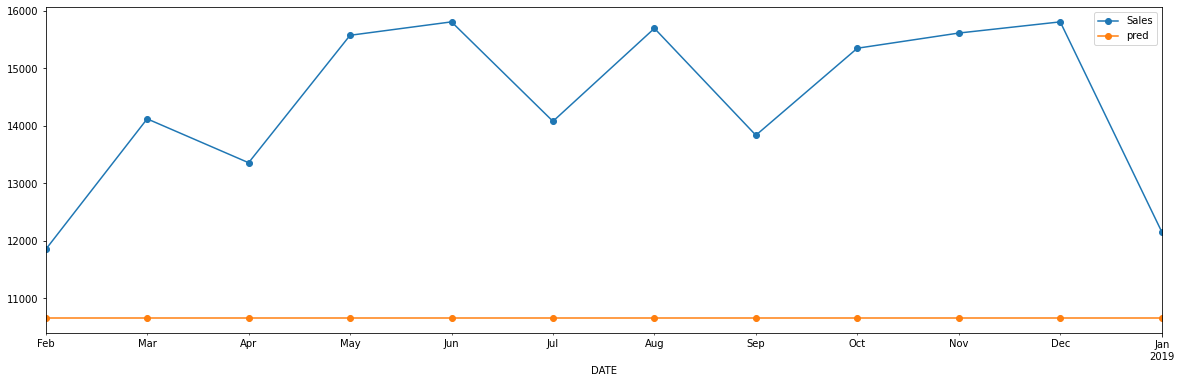

In [ ]:
test_x['pred'] = train_x['Sales'].mean()

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

It is evident that this a very bad model.

> **Q. How do we interpret the MAE score?**

This is mostly used in cases where we need to **compare multiple models.**

In such a case, we can say how well each model is performing, based on which model fetches the lowest MAE.

In this case, we can interpret it as, given that the model's values fluctuate between roughly 6k to 16k, and within those fluctuations, this model's error is around 3.7k approx.

The mean of data is approx 10k, and we're getting an MAE of 3.7k, this means roughly 37% predictions are wrong, **with respect to the mean**.

This is not good.

<br>

> **Q. How do we interpret the RMSE score?**

This value also, we're getting around 4k, which is close to the MAE

This metric is also used to **compare** performance among different models.

This value also doesn't seem to be good.

<br>

> **Q. How do we interpret the MAPE score?**

This is straightforward to intrpret.

For this model, we get MAPE as 0.255. This means that we have 25.5% error, **with respect to its own value**.

Lets look at some other way to forecast future values
### 2. Naive Approach



> **Q.What if we take the current value, and forecast that?**

Let's simply take the value of series at time $t=k-1$ (i.e. $x_{k-1}$), and forecast that for all future.

This is called the **Naive** approach of forecasting.

![picture](https://drive.google.com/uc?export=view&id=1v6j5ULK7cbaviqoY6zSksCHqljvAX0Xz)


> **Q. What if we get a different value for series at t=k, would this not change all the future forecasts we had made earlier?**

Yes, as per this rule, it would.

This raises a conflict.

For example,
- Based on data available till March, you forecast that June sales would be $X_{March}$
- But after the month of April, you tell the client that, now the June sales should be $X_{April}$
- Not to mention, your forecast for April came out to be incorrect as well.
- You can easily loose the client's trust based on this approach

Hence, this is not a very intelligent approach.



In [ ]:
train_x['Sales'][-1]

11005.0

MAE : 3434.233
RMSE : 3697.005
MAPE: 0.23


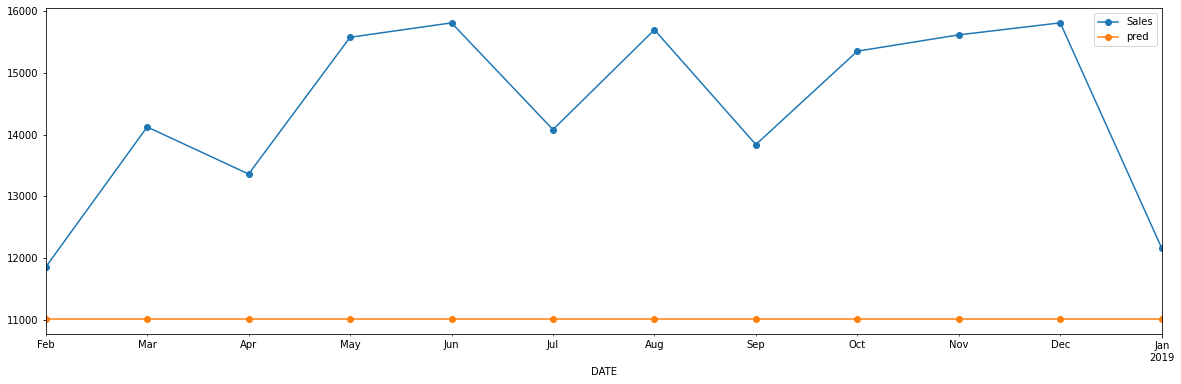

In [ ]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

This model's performance is slighly better, but we can see it's still really bad.

---

### 3. Seasonal Naive Forecast

We can perhaps take a smarter approach to optimise the Naive method.

> **Q. What if we consider the seasonality patterns?**

We can set each forecast to be equal to the last observed value from the same season (e.g., the same month of the previous year).

This way, we're essentially forecasting the future values to be exactly same as last season.

This is called **Seasonal Naive Forecast**.

![picture](https://drive.google.com/uc?export=view&id=1xFX6Ggl1KZw_Z_5IL1YUlYN4by5t0ybA)

MAE : 800.867
RMSE : 1067.837
MAPE: 0.055


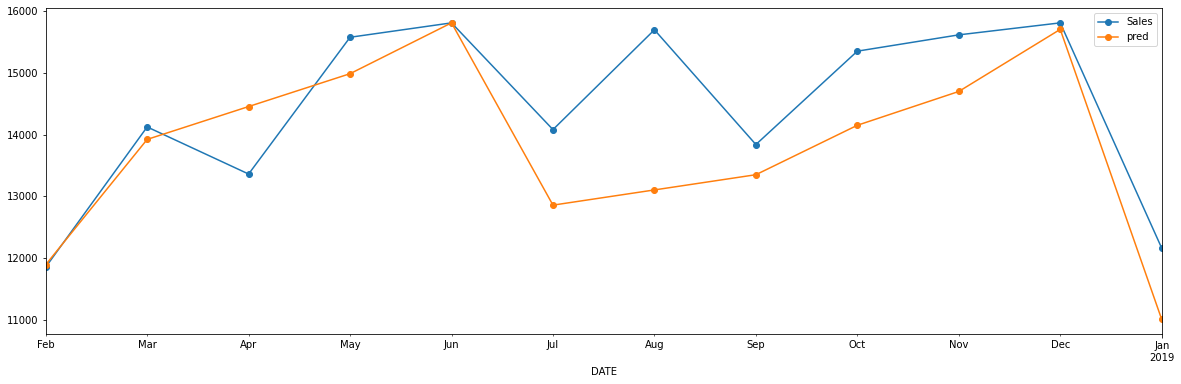

In [ ]:
for i in test_x.index:
  test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

---

### 4. Drift Method

> **Q. What if instead of just picking up some value from the past, we let our values increase or decrease over time?**

We can allow the forecasts to increase or decrease over time, where the amount of change over time (called the **drift**) is set to be the average change seen in the historical data.

This is equivalent to taking the first and last point of your data and drawing a line between those points, and then extending this line into the future to get a forecast. (**linear extrapolation**)


![picture](https://drive.google.com/uc?export=view&id=1TwwRLNIuiKupgBTLqJHyj1NywzDLJrlR)

MAE : 3321.482
RMSE : 3586.323
MAPE: 0.223


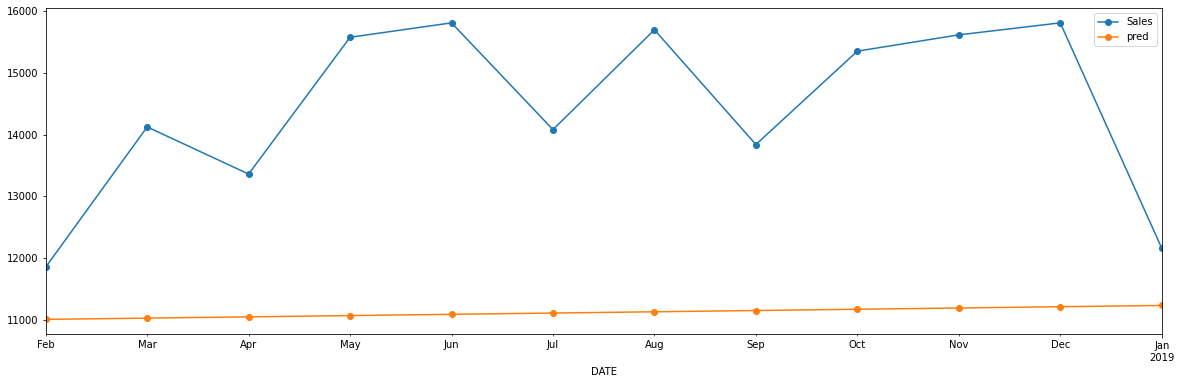

In [ ]:
# Get the slope
y_t = train_x['Sales'][-1]
m = (y_t - train_x['Sales'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

We can see there is a drift present in our forecasts. Also, this is highly sesitive to the last value available. For example, see the following

MAE : 1503.589
RMSE : 2013.071
MAPE: 0.115


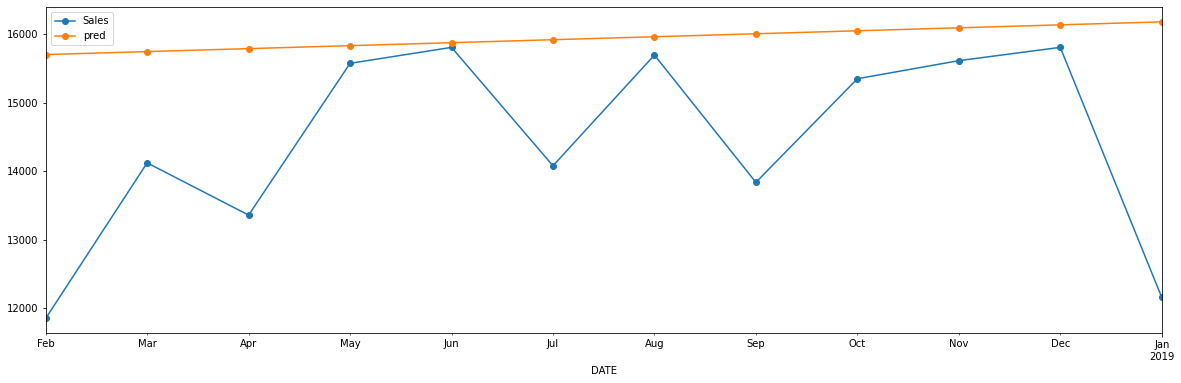

In [ ]:
# Get the slope
y_t = train_x['Sales'][-2]
m = (y_t - train_x['Sales'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])


![picture](https://drive.google.com/uc?export=view&id=1yXRkqMBuet3wkuFnzEh3RnPOgXmccnYu)

These simple models are not exactly giving any smart forecasts.

#### Q. Why are we studying simple methods?
Sometimes one of these simple methods will be the best forecasting method available.

But in many cases, these methods will serve as benchmarks rather than the method of choice.

That is, any forecasting methods we develop will be compared to these simple methods to ensure that the new method is better than these simple alternatives.

If not, the new method is not worth considering.

We have not yet achieved the desired level of MAPE score (<5%).



---
---